# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
Three observable trends:
    1: The Temperature increases as you gain closer to the equator.  
    2: Humidity has a positive trend with Latitude. This means as you go North, generally you will have a more cities with higher humidity. 
    3: Wind Speed is roughly constant throughout the Earth regardless of longitude or Latitude. Only minor trend lines, although mainly randomly distributed.


In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat = []
lon = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
#url for lat and longitude
max_temp = []
humidity = []
cloudiness = []
wind_speed=[]
country= []
date= []
town =[]
lat2=[]
lng2=[]



print('Beginning Data Retrieval\n'\
     '-----------------------------')

for index, city in enumerate(cities):
    try: 
            if (index <50):
                print(f'Processing Record {index + 1} of Set {1}'\
                 f' | {city}')
            if (index<100)&(index>50):
                print(f'Processing Record {index + 1} of Set {2}'\
                f' | {city}')
            if (index<150)&(index>100):
                print(f'Processing Record {index + 1} of Set {3}'\
                f' | {city}')
            if (index<200)&(index>150):
                print(f'Processing Record {index + 1} of Set {4}'\
                 f' | {city}')
            if (index<250)&(index>200):
                print(f'Processing Record {index + 1} of Set {5}'\
                 f' | {city}')
            if (index<300)&(index>250):
                print(f'Processing Record {index + 1} of Set {6}'\
                 f' | {city}')
            if (index<350)&(index>300):
                print(f'Processing Record {index + 1} of Set {7}'\
                 f' | {city}')
            if (index<400)&(index>350):
                print(f'Processing Record {index + 1} of Set {8}'\
                 f' | {city}')
            if (index<450)&(index>400):
                print(f'Processing Record {index + 1} of Set {9}'\
                 f' | {city}')
            if (index<500)&(index>550):
                print(f'Processing Record {index + 1} of Set {10}'\
                 f' | {city}')
            if (index<550)&(index>600):
                print(f'Processing Record {index + 1} of Set {11}'\
                 f' | {city}')
            if (index<600)&(index>650):
                print(f'Processing Record {index + 1} of Set {12}'\
                 f' | {city}')

#         # print_cities(cities)
            url2= "http://api.openweathermap.org/data/2.5/weather?"

            query_url = f"{url2}&lat={lats}&lon={lngs}&appid={weather_api_key}&q={city}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            lat2.append(weather_json['coord']['lat'])
            lng2.append(weather_json['coord']['lon'])
            town.append(weather_json['name'])
            max_temp.append(weather_json['main']['temp_max'])
            humidity.append(weather_json['main']['humidity'])
            cloudiness.append(weather_json['clouds']['all'])
            wind_speed.append(weather_json['wind']['speed'])
            country.append(weather_json['sys']['country'])
            date.append(weather_json['dt'])

    except: 
        print("City not found. Skipping...")
    pass
    

# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# query_url = url2 + lats + lngs + appid= + weather_api_key
# query_url = f"{url2}appid={weather_api_key}&units={units}&q="



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | varnamo
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | ereymentau
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | djibo
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | jiuquan
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | sumenep
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | canutama
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | nikol

Processing Record 186 of Set 4 | portland
Processing Record 187 of Set 4 | chara
Processing Record 188 of Set 4 | asfi
Processing Record 189 of Set 4 | san policarpo
Processing Record 190 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 191 of Set 4 | yellowknife
Processing Record 192 of Set 4 | koroni
Processing Record 193 of Set 4 | virginia beach
Processing Record 194 of Set 4 | fortuna
Processing Record 195 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 196 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 197 of Set 4 | ojinaga
Processing Record 198 of Set 4 | mehran
Processing Record 199 of Set 4 | eureka
Processing Record 200 of Set 4 | lincoln
Processing Record 202 of Set 5 | khatanga
Processing Record 203 of Set 5 | longyearbyen
Processing Record 204 of Set 5 | vaitape
Processing Record 205 of Set 5 | mwandiga
Processing Record 206 of Set 5 | ekhabi
Processing Record 207 of Set 5 | roebourne
Processing Record 208 of Set

Processing Record 375 of Set 8 | yershov
Processing Record 376 of Set 8 | kushiro
Processing Record 377 of Set 8 | vigrestad
Processing Record 378 of Set 8 | zhezkazgan
Processing Record 379 of Set 8 | bonthe
Processing Record 380 of Set 8 | banda aceh
Processing Record 381 of Set 8 | ust-nera
Processing Record 382 of Set 8 | hellvik
Processing Record 383 of Set 8 | vazante
Processing Record 384 of Set 8 | cayenne
Processing Record 385 of Set 8 | preobrazheniye
Processing Record 386 of Set 8 | yucaipa
Processing Record 387 of Set 8 | chihuahua
Processing Record 388 of Set 8 | yerbogachen
Processing Record 389 of Set 8 | praia da vitoria
Processing Record 390 of Set 8 | luwuk
Processing Record 391 of Set 8 | xiongzhou
Processing Record 392 of Set 8 | san
Processing Record 393 of Set 8 | mrirt
City not found. Skipping...
Processing Record 394 of Set 8 | doksy
Processing Record 395 of Set 8 | olinda
Processing Record 396 of Set 8 | ossora
Processing Record 397 of Set 8 | la palma
Processi

In [80]:
# Temprature is Not Correct From API
weather_json

{'coord': {'lon': 45.3438, 'lat': 2.0371},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 302.15,
  'feels_like': 299.14,
  'temp_min': 302.15,
  'temp_max': 302.15,
  'pressure': 1013,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 8.75, 'deg': 60},
 'clouds': {'all': 40},
 'dt': 1612424454,
 'sys': {'type': 1,
  'id': 2497,
  'country': 'SO',
  'sunrise': 1612408286,
  'sunset': 1612451618},
 'timezone': 10800,
 'id': 53654,
 'name': 'Mogadishu',
 'cod': 200}

In [81]:
 d= {     "City"     : town,
          "Max Temp" : max_temp,
          "Humidity" : humidity,
          "Longitude" : lng2,
          "Latitude" : lat2,
          "Cloudiness" : cloudiness,
          "Country" : country,
          "Windspeed" : wind_speed,
          "Date" : date
          }
df = pd.DataFrame(d)
df.head()
df.to_csv("HW.csv",index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
df

,City,Max Temp,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,Värnamo,263.71,92,14.0400,57.1860,64,SE,2.24,1612424205
1,Mossamedes,297.50,58,12.1522,-15.1961,43,AO,2.56,1612424205
2,Ereymentau,269.65,98,73.1033,51.6199,100,KZ,5.34,1612424205
3,Bluff,285.49,68,168.3333,-46.6000,0,NZ,9.00,1612424206
4,Leningradskiy,241.22,85,178.4167,69.3833,98,RU,2.16,1612424206
...,...,...,...,...,...,...,...,...,...
568,Lahr,279.15,87,7.8667,48.3500,0,DE,1.54,1612424453
569,Maniitsoq,256.94,73,-52.9000,65.4167,0,GL,4.11,1612424453
570,Yueyang,282.86,90,113.0919,29.3333,100,CN,4.54,1612424453
571,Nizhniy Kuranakh,245.91,84,125.4869,58.8353,97,RU,0.63,1612424454


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
df.query('Humidity > 100')
#Step Not needed

,City,Max Temp,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date


In [84]:
#  Get the indices of cities that have humidity over 100%.


In [85]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df

,City,Max Temp,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,Värnamo,263.71,92,14.0400,57.1860,64,SE,2.24,1612424205
1,Mossamedes,297.50,58,12.1522,-15.1961,43,AO,2.56,1612424205
2,Ereymentau,269.65,98,73.1033,51.6199,100,KZ,5.34,1612424205
3,Bluff,285.49,68,168.3333,-46.6000,0,NZ,9.00,1612424206
4,Leningradskiy,241.22,85,178.4167,69.3833,98,RU,2.16,1612424206
...,...,...,...,...,...,...,...,...,...
568,Lahr,279.15,87,7.8667,48.3500,0,DE,1.54,1612424453
569,Maniitsoq,256.94,73,-52.9000,65.4167,0,GL,4.11,1612424453
570,Yueyang,282.86,90,113.0919,29.3333,100,CN,4.54,1612424453
571,Nizhniy Kuranakh,245.91,84,125.4869,58.8353,97,RU,0.63,1612424454


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

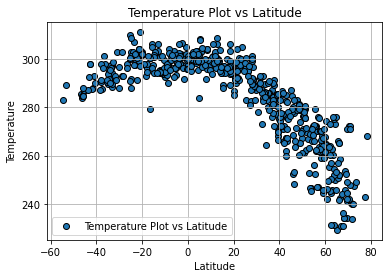

This graph shows that as you get closer to the equater the Temperature Increases


In [86]:
Plot1=df.loc[:,["Max Temp","Latitude"]]
# Plot2=Plot1.query("Lng >0")
Temp=Plot1["Max Temp"]
Lat=Plot1["Latitude"]
plt.scatter(Lat,Temp,label= "Temperature Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Temperature Plot vs Latitude" )
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend()
plt.show()
print("This graph shows that as you get closer to the equater the Temperature Increases")

## Latitude vs. Humidity Plot

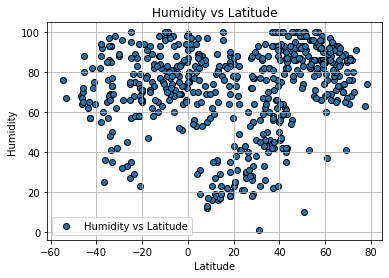

This graph shows that Latitude does not affect Humidity, rather Humidity is neraly a  Random distrubtion


In [87]:
Plot1=df.loc[:,["Humidity","Latitude"]]
# Plot2=Plot1.query("Lng >0")
Hum=Plot1["Humidity"]
Lat=Plot1["Latitude"]
plt.scatter(Lat,Hum,label= "Humidity vs Latitude", edgecolors="black")
plt.grid()
plt.title("Humidity vs Latitude" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend()
plt.show()
print("This graph shows that Latitude does not affect Humidity, rather Humidity is neraly a  Random distrubtion")

## Latitude vs. Cloudiness Plot

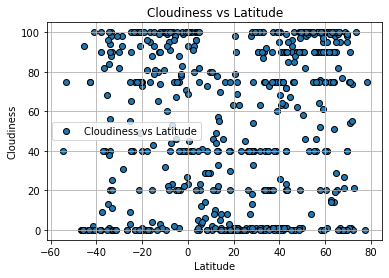

This graph shows that Latitude does not affect Cloudiness,Cloudiness is rather randomly distributed 


In [88]:
Plot1=df.loc[:,["Cloudiness","Latitude"]]
# Plot2=Plot1.query("Lng >0")
Lat=Plot1["Latitude"]
Cloud=Plot1["Cloudiness"]
plt.scatter(Lat,Cloud,label= "Cloudiness vs Latitude", edgecolors="black")
plt.grid()
plt.title("Cloudiness vs Latitude" )
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.legend()
plt.show()
print("This graph shows that Latitude does not affect Cloudiness,Cloudiness is rather randomly distributed ")

## Latitude vs. Wind Speed Plot

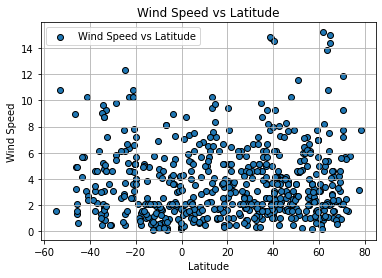

This graph shows that Latitude does not affect Wind Speed, rather Wind Speed is roughly constant regardless of Latitude


In [89]:
Plot1=df.loc[:,["Windspeed","Latitude"]]
# Plot2=Plot1.query("Lng >0")
Lat=Plot1["Latitude"]
Cloud=Plot1["Windspeed"]
plt.scatter(Lat,Cloud,label= "Wind Speed vs Latitude", edgecolors="black")
plt.grid()
plt.title("Wind Speed vs Latitude" )
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.legend()
plt.show()
print("This graph shows that Latitude does not affect Wind Speed, rather Wind Speed is roughly constant regardless of Latitude")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

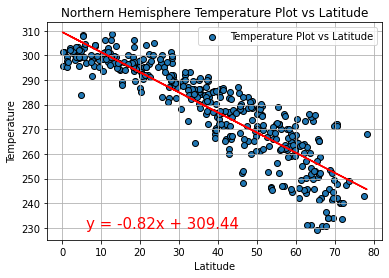

The Linear Regression shows that Temprature has a negative linear correlation with  Latitude. This means as you go   farther North the Temperature decreases


In [90]:
Plot1=df.loc[:,["Max Temp","Latitude"]]
Plot2=Plot1.query("Latitude >0")
Temp=Plot2["Max Temp"]
Lat=Plot2["Latitude"]
plt.scatter(Lat,Temp,label= "Temperature Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Northern Hemisphere Temperature Plot vs Latitude" )
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,230),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Temprature has a negative linear correlation with  Latitude. This means as you go   farther North the Temperature decreases")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

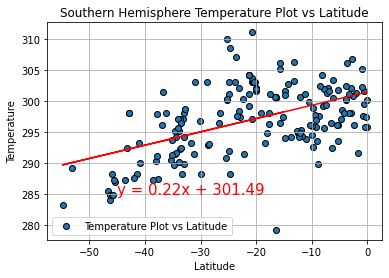

The Linear Regression shows that Temprature has a positive linear correlation with  Latitude. This means as you go   farther North the Temperature increases


In [91]:
Plot1=df.loc[:,["Max Temp","Latitude"]]
Plot3=Plot1.query("Latitude <0")
Temp=Plot3["Max Temp"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Temperature Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Southern Hemisphere Temperature Plot vs Latitude" )
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-45,285),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Temprature has a positive linear correlation with  Latitude. This means as you go   farther North the Temperature increases")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

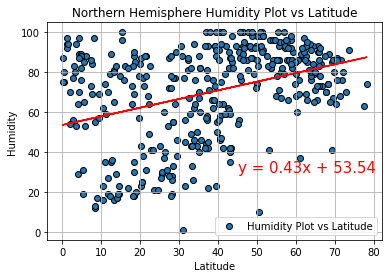

The Linear Regression shows that Humidity has a  positive linear correlation with  Latitude. This means as you go   farther North the Humidity  increases


In [92]:
Plot1=df.loc[:,["Humidity","Latitude"]]
Plot2=Plot1.query("Latitude >0")
Temp=Plot2["Humidity"]
Lat=Plot2["Latitude"]
plt.scatter(Lat,Temp,label= "Humidity Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Northern Hemisphere Humidity Plot vs Latitude" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Humidity has a  positive linear correlation with  Latitude. This means as you go   farther North the Humidity  increases")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

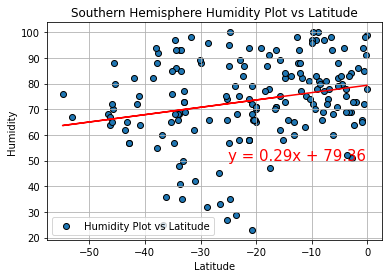

The Linear Regression shows that Humidity has a small positive linear correlation with  Latitude. This means as you  go farther North the Humidity slighly increases


In [93]:
Plot1=df.loc[:,["Humidity","Latitude"]]
Plot3=Plot1.query("Latitude <0")
Temp=Plot3["Humidity"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Humidity Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Southern Hemisphere Humidity Plot vs Latitude" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Humidity has a small positive linear correlation with  Latitude. This means as you  go farther North the Humidity slighly increases")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

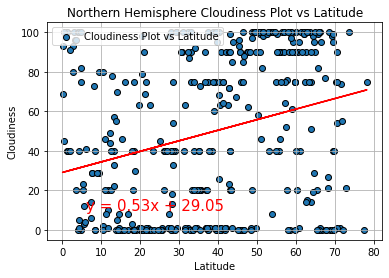

The Linear Regression shows that Humidity has a strong correlation with  Latitude. This means as you  go farther North the Humidity increses


In [94]:
Plot1=df.loc[:,["Cloudiness","Latitude"]]
Plot3=Plot1.query("Latitude >0")
Temp=Plot3["Cloudiness"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Cloudiness Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Northern Hemisphere Cloudiness Plot vs Latitude" )
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Humidity has a strong correlation with  Latitude. This means as you  go farther North the Humidity increses")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

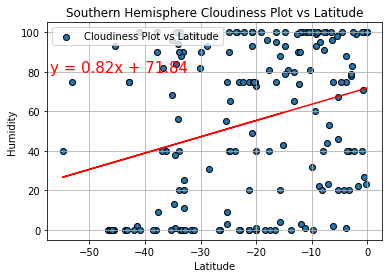

The Linear Regression shows that Cloudiness has a small positive linear correlation with  Latitude. This means as you  go farther North the Cloudiness slighly increases


In [95]:
Plot1=df.loc[:,["Cloudiness","Latitude"]]
Plot3=Plot1.query("Latitude <0")
Temp=Plot3["Cloudiness"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Cloudiness Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Southern Hemisphere Cloudiness Plot vs Latitude" )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-57,80),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Cloudiness has a small positive linear correlation with  Latitude. This means as you  go farther North the Cloudiness slighly increases")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

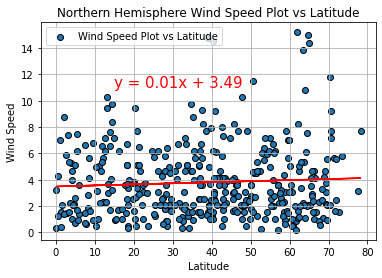

The Linear Regression shows that Wind Speed has a small positive linear correlation with  Latitude. This means as you go   farther North the Wind Speed slighly increases


In [96]:
Plot1=df.loc[:,["Windspeed","Latitude"]]
Plot3=Plot1.query("Latitude >0")
Temp=Plot3["Windspeed"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Wind Speed Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Northern Hemisphere Wind Speed Plot vs Latitude" )
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(15,11),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Wind Speed has a small positive linear correlation with  Latitude. This means as you go   farther North the Wind Speed slighly increases")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

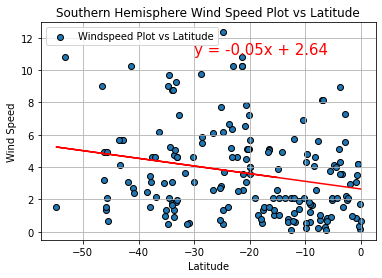

The Linear Regression shows that Wind Speed has a negative linear correlation with  Latitude. This means as you go   farther North the Wind Speed decreases


In [97]:
Plot1=df.loc[:,["Windspeed","Latitude"]]
Plot3=Plot1.query("Latitude <0")
Temp=Plot3["Windspeed"]
Lat=Plot3["Latitude"]
plt.scatter(Lat,Temp,label= "Windspeed Plot vs Latitude", edgecolors="black")
plt.grid()
plt.title("Southern Hemisphere Wind Speed Plot vs Latitude" )
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.legend()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Lat,Temp)
regress_values = Lat * slope + intercept
plt.plot(Lat,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")
plt.show()

print("The Linear Regression shows that Wind Speed has a negative linear correlation with  Latitude. This means as you go   farther North the Wind Speed decreases")